# Vesuvius Challenge!

<!-- 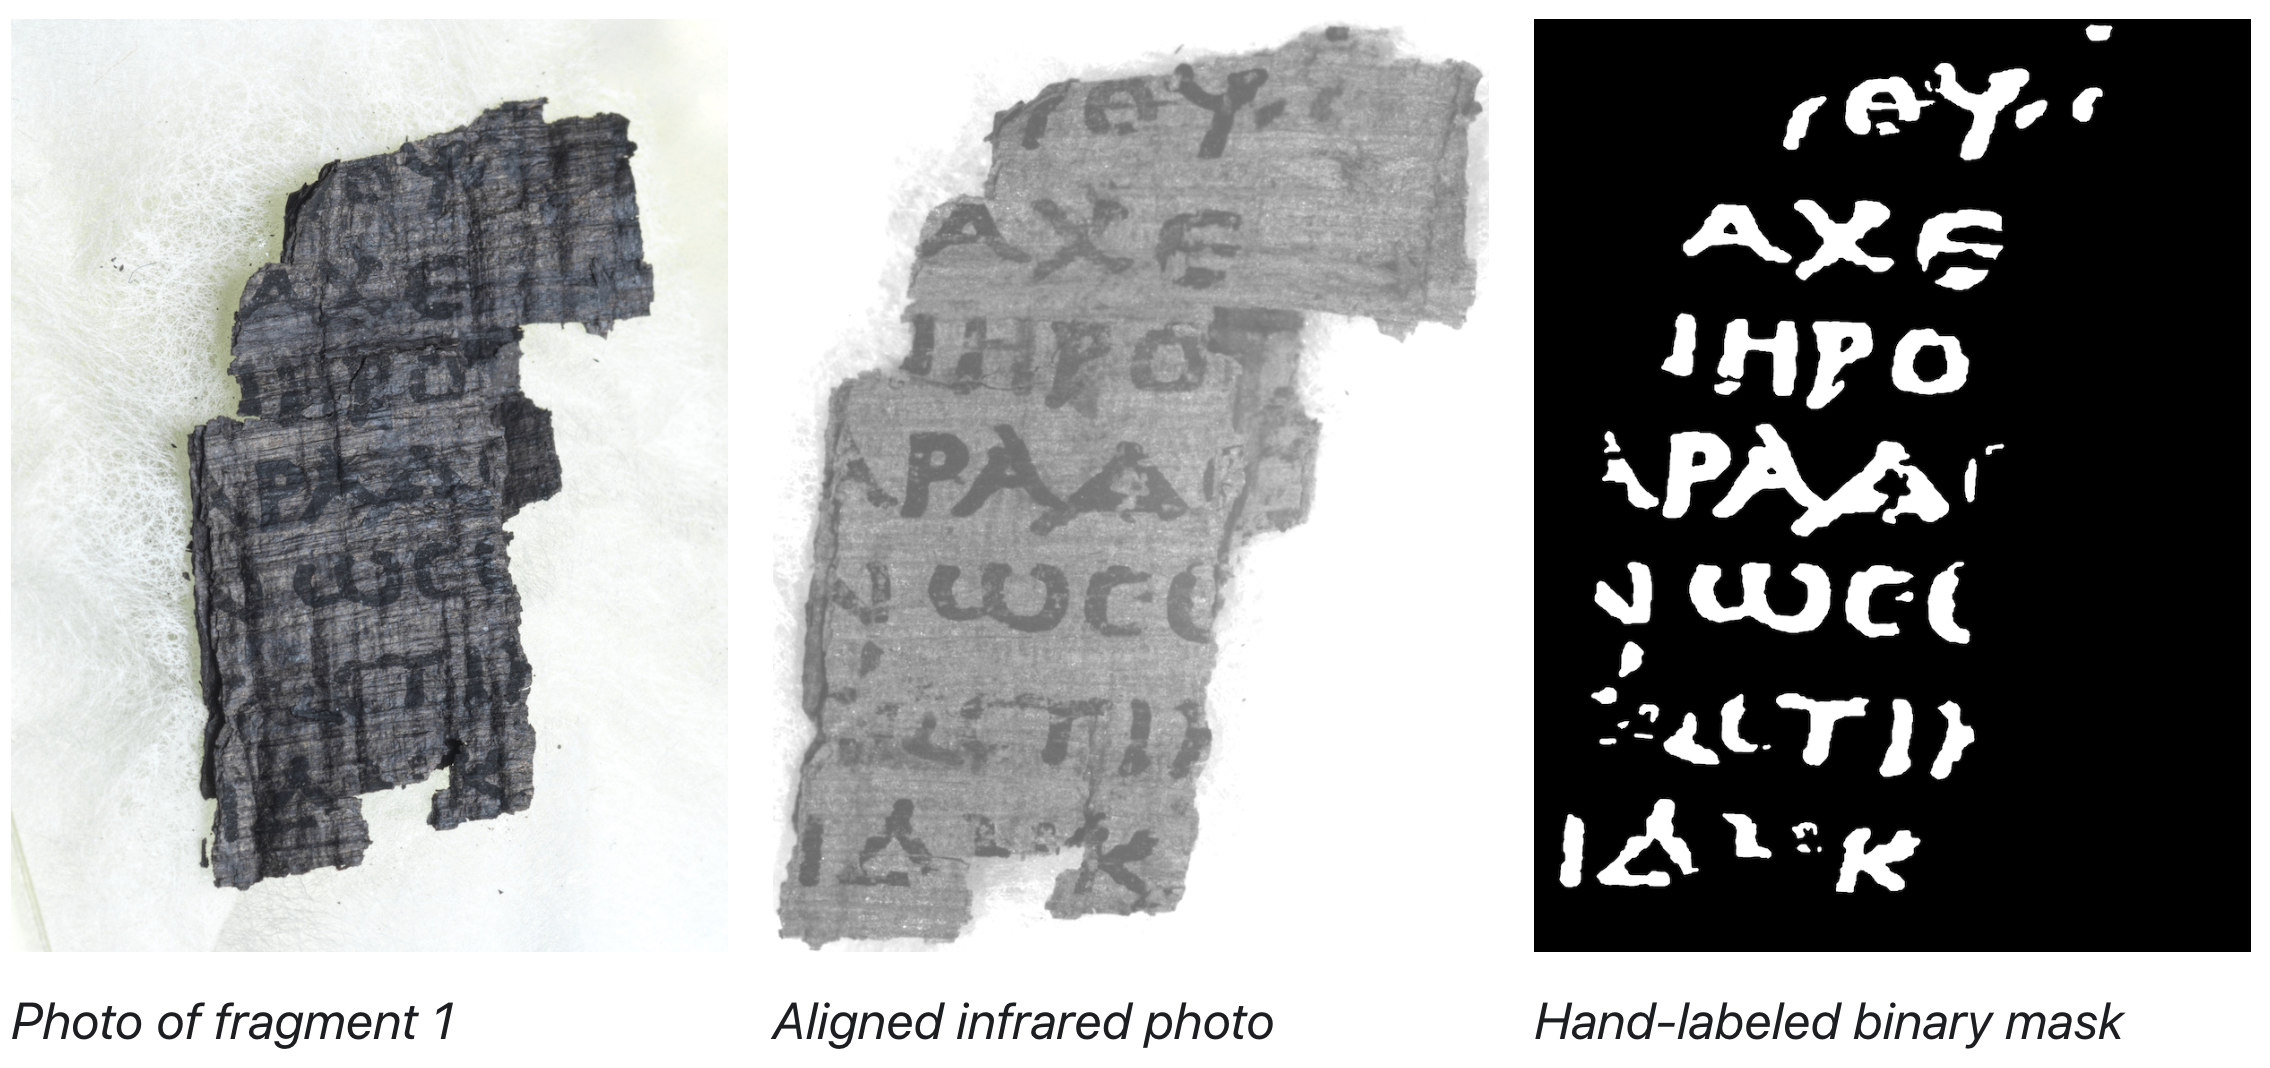 -->

## Imports

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import glob
import PIL.Image as Image
import torch.utils.data as data
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from ipywidgets import interact, fixed

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"on device: {device}")

on device: cpu


## Understanding data

There are 1 directories and 4 images in '/kaggle/input/vesuvius-challenge-ink-detection/train/1'.
There are 0 directories and 65 images in '/kaggle/input/vesuvius-challenge-ink-detection/train/1/surface_volume'.
['ir.png', 'inklabels_rle.csv', 'inklabels.png', 'mask.png', 'surface_volume']
img_original shape: (8181, 6330)
img_ink_labels shape: (8181, 6330)
img_ink_mask shape: (8181, 6330)


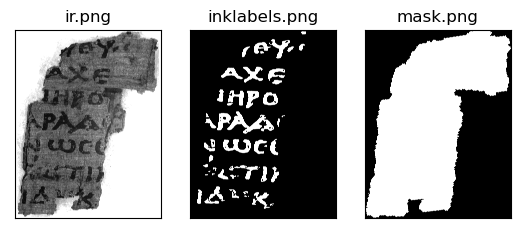

In [8]:
from pathlib import Path
import os
filepath = '/kaggle/input/vesuvius-challenge-ink-detection/train/1/'
# File walkthrough
for dirpath, dirnames, filenames in os.walk(Path(filepath)):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print(os.listdir(filepath))

img_original = np.array(Image.open(filepath+'ir.png'))
img_ink_labels = np.array(Image.open(filepath+'inklabels.png'))
img_ink_mask = np.array(Image.open(filepath+'mask.png'))
print(f"img_original shape: {img_original.shape}")
print(f"img_ink_labels shape: {img_ink_labels.shape}")
print(f"img_ink_mask shape: {img_ink_mask.shape}")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_title('ir.png')
ax1.imshow(img_original, cmap = 'gray')
ax2.set_title('inklabels.png')
ax2.imshow(img_ink_labels, cmap = 'gray')
ax3.set_title('mask.png')
ax3.imshow(img_ink_mask, cmap = 'gray')
for ax in [ax1, ax2, ax3]:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

65 ['00.tif', '01.tif', '02.tif']
[0.0, 0.69755095, 0.8771649, 0.855787]


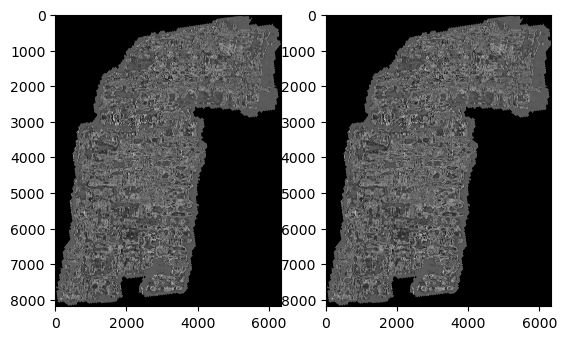

In [10]:


#Each tif file is a layer in the scan
tif_filepath = filepath + 'surface_volume/'
tif_filenames = sorted(os.listdir(tif_filepath))
print(len(tif_filenames), tif_filenames[:3])
images = []
for path in tif_filenames[:5]:
    images.append(np.array(Image.open(tif_filepath+path), dtype = np.float32)/65535.0)
print([images[0][i].max() for i in range(0, 2000, 500)])

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(images[0], cmap = 'gray')
ax2.imshow(images[1], cmap = 'gray')
plt.show()

In [11]:
image_stack = torch.stack([torch.from_numpy(img) for img in images], dim = 0)
print(image_stack.shape)

torch.Size([5, 8181, 6330])
